# GAI 作業一
* Numpy
* Pandas
* Matplotlib
* Scikit-learn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('ggplot')

## Numpy 練習

### 練習一：softmax 函數

In [2]:
# 設定總共類別
c = 10
# 模擬輸出 logits
x = np.random.rand(c)

# TODO
def softmax(x):
    exp_x = np.exp(x)
    return exp_x / np.sum(exp_x)

print("logits:")
print(x)
print("---------------------")
print("softmax")
print(softmax(x))

logits:
[0.19862971 0.8942384  0.34165733 0.16195806 0.44294807 0.40563763
 0.9915159  0.20313835 0.74866728 0.83389752]
---------------------
softmax
[0.06913451 0.13860979 0.07976475 0.06664516 0.08826754 0.08503492
 0.15277103 0.06944692 0.1198321  0.1304933 ]


### 練習二：Linear Layer + ReLU Activation

In [3]:
# 設定輸入維度
d_in = 10
# 設定輸出維度
d_out = 30

# 模擬神經網路輸入
x = np.ones((d_in, 1))
# 模擬神經網路權重
W = np.random.rand(d_out, d_in) * 10 - 5
# 模擬神經網路偏差值
b = np.random.rand(d_out, 1) * 10 - 5

# TODO
linear = lambda x: W@x + b
relu = lambda logit: np.where(logit > 0, logit, 0)

print("input:")
print(x)
print("---------------------")
print("output")
print(relu(linear(x)))

input:
[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]
---------------------
output
[[ 0.        ]
 [11.22190637]
 [16.70563222]
 [ 0.        ]
 [ 0.        ]
 [ 2.70338612]
 [ 1.38826939]
 [ 8.3477305 ]
 [ 3.85082052]
 [ 0.        ]
 [ 6.62157189]
 [14.37228395]
 [ 0.        ]
 [ 5.12108599]
 [ 0.        ]
 [12.60924705]
 [ 0.        ]
 [ 7.49045802]
 [ 0.        ]
 [22.67919967]
 [ 2.15363236]
 [ 3.91950538]
 [ 0.        ]
 [ 6.48245431]
 [ 0.        ]
 [ 6.13666582]
 [ 6.2384015 ]
 [ 0.        ]
 [ 0.        ]
 [10.11687072]]


## Pandas 練習

### 練習一：數值轉換

In [4]:
# 讀取資料
# 資料中第一列（row）為中文欄位名稱，第二列為英文欄位名稱
# 選擇使用中文欄位名稱進行操作
weather_filename = "./data/467410-2022-08.csv"
weather_df = pd.read_csv(weather_filename, skiprows=[1])

def to_uv_level(uv_value):
    if 0 <= uv_value <= 2:
        return "低"
    elif 3 <= uv_value <= 5:
        return "中"
    elif 6 <= uv_value <= 7:
        return "高"
    elif 8 <= uv_value <= 10:
        return "甚高"
    elif uv_value >= 11:
        return "極高"

# 新增轉換後欄位為uv_level
weather_df["日最高紫外線強度等級"] = weather_df["日最高紫外線指數"].apply(to_uv_level)
weather_df.head(2)

,觀測時間(day),測站氣壓(hPa),海平面氣壓(hPa),測站最高氣壓(hPa),測站最高氣壓時間(LST),測站最低氣壓(hPa),測站最低氣壓時間(LST),氣溫(℃),最高氣溫(℃),最高氣溫時間(LST),...,最大六十分鐘降水量(mm),最大六十分鐘降水量起始時間(LST),日照時數(hour),日照率(%),全天空日射量(MJ/㎡),能見度(km),日最高紫外線指數,日最高紫外線指數時間(LST),總雲量(0~10),日最高紫外線強度等級
0,1,1004.2,1007.3,1005.5,2022/08/01 22:09:00,1002.6,2022/08/01 02:00:00,29.3,33.2,2022/08/01 11:37:00,...,T,2022/08/01 16:24:00,3.1,23.4,17.11,20.0,11,2022/08/01 12:00:00,9.0,極高
1,2,1005.9,1009.0,1008.1,2022/08/02 10:34:00,1003.9,2022/08/02 16:38:00,27.5,28.9,2022/08/02 00:01:00,...,67.5,2022/08/02 09:42:00,0.0,0.0,6.34,14.0,4,2022/08/02 14:00:00,9.6,中


In [5]:
# 輸出統計數量
print(
    dict( weather_df["日最高紫外線強度等級"].value_counts() )
)

{'極高': 24, '甚高': 4, '高': 2, '中': 1}


### 練習二：條件篩選

清理資料並計算降水強度

In [6]:
def clean_raining_column(raining_value):
    # 用來清掉奇怪的值
    if raining_value == 'T':
        return 0.0
    return float(raining_value)

def calculate_raining_level(row):
    # 轉換所有數值為 float
    raining_value = float(row["降水量(mm)"])
    raining_hours = float(row["降水時數(hour)"])
    return raining_value/raining_hours if raining_hours != 0.0 else 0.0

weather_df["降水量(mm)"] = weather_df["降水量(mm)"].apply(clean_raining_column)
weather_df["降水強度(mm/hr)"] = weather_df.apply(calculate_raining_level, axis=1)
weather_df.head(2)

,觀測時間(day),測站氣壓(hPa),海平面氣壓(hPa),測站最高氣壓(hPa),測站最高氣壓時間(LST),測站最低氣壓(hPa),測站最低氣壓時間(LST),氣溫(℃),最高氣溫(℃),最高氣溫時間(LST),...,最大六十分鐘降水量起始時間(LST),日照時數(hour),日照率(%),全天空日射量(MJ/㎡),能見度(km),日最高紫外線指數,日最高紫外線指數時間(LST),總雲量(0~10),日最高紫外線強度等級,降水強度(mm/hr)
0,1,1004.2,1007.3,1005.5,2022/08/01 22:09:00,1002.6,2022/08/01 02:00:00,29.3,33.2,2022/08/01 11:37:00,...,2022/08/01 16:24:00,3.1,23.4,17.11,20.0,11,2022/08/01 12:00:00,9.0,極高,0.000000
1,2,1005.9,1009.0,1008.1,2022/08/02 10:34:00,1003.9,2022/08/02 16:38:00,27.5,28.9,2022/08/02 00:01:00,...,2022/08/02 09:42:00,0.0,0.0,6.34,14.0,4,2022/08/02 14:00:00,9.6,中,25.277778


找出降水強度超過平均者

In [7]:
avg_value = np.mean(weather_df["降水強度(mm/hr)"])
weather_df[weather_df["降水強度(mm/hr)"] > avg_value]

,觀測時間(day),測站氣壓(hPa),海平面氣壓(hPa),測站最高氣壓(hPa),測站最高氣壓時間(LST),測站最低氣壓(hPa),測站最低氣壓時間(LST),氣溫(℃),最高氣溫(℃),最高氣溫時間(LST),...,最大六十分鐘降水量起始時間(LST),日照時數(hour),日照率(%),全天空日射量(MJ/㎡),能見度(km),日最高紫外線指數,日最高紫外線指數時間(LST),總雲量(0~10),日最高紫外線強度等級,降水強度(mm/hr)
1,2,1005.9,1009.0,1008.1,2022/08/02 10:34:00,1003.9,2022/08/02 16:38:00,27.5,28.9,2022/08/02 00:01:00,...,2022/08/02 09:42:00,0.0,0.0,6.34,14.0,4,2022/08/02 14:00:00,9.6,中,25.277778
6,7,1005.3,1008.4,1007.3,2022/08/07 23:00:00,1003.4,2022/08/07 14:23:00,28.7,33.5,2022/08/07 11:55:00,...,2022/08/07 14:40:00,3.9,30.0,12.47,21.6,8,2022/08/07 12:00:00,7.2,甚高,13.035714
8,9,1005.1,1008.2,1006.8,2022/08/09 22:13:00,1003.6,2022/08/09 15:12:00,29.1,33.4,2022/08/09 12:04:00,...,2022/08/09 13:40:00,4.0,30.8,13.18,9.2,7,2022/08/09 12:00:00,8.0,高,6.764706
9,10,1005.7,1008.8,1007.8,2022/08/10 21:25:00,1003.7,2022/08/10 05:50:00,28.9,34.9,2022/08/10 13:40:00,...,2022/08/10 16:04:00,7.2,54.9,20.33,22.0,13,2022/08/10 13:00:00,4.6,極高,9.354839
14,15,1004.1,1007.2,1005.1,2022/08/15 21:49:00,1002.9,2022/08/15 13:51:00,28.8,33.1,2022/08/15 13:36:00,...,2022/08/15 14:33:00,2.8,21.5,12.11,24.0,8,2022/08/15 14:00:00,8.2,甚高,8.200000
15,16,1004.3,1007.4,1006.0,2022/08/16 22:42:00,1002.8,2022/08/16 14:42:00,28.8,33.9,2022/08/16 11:34:00,...,2022/08/16 14:02:00,6.9,53.7,18.03,22.0,11,2022/08/16 11:00:00,5.4,極高,9.047619
16,17,1004.8,1007.9,1006.4,2022/08/17 21:48:00,1002.9,2022/08/17 15:31:00,28.5,32.2,2022/08/17 11:51:00,...,2022/08/17 17:43:00,4.2,32.4,18.91,40.0,13,2022/08/17 13:00:00,7.2,極高,6.511628
17,18,1004.5,1007.6,1005.8,2022/08/18 22:53:00,1003.0,2022/08/18 04:12:00,27.1,31.1,2022/08/18 10:22:00,...,2022/08/18 12:47:00,1.0,7.8,8.92,22.0,7,2022/08/18 10:00:00,9.8,高,12.916667


## Matplotlib 練習

### 練習一：折線圖

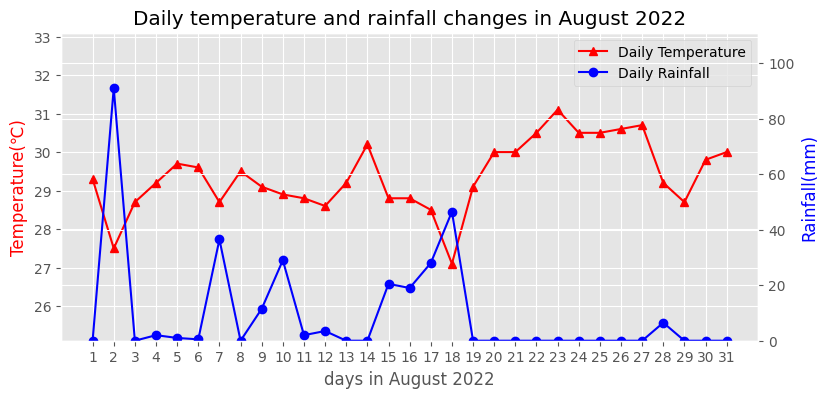

In [8]:
fig, ax = plt.subplots(figsize=(9, 4))
plt.title("Daily temperature and rainfall changes in August 2022")
ax2 = ax.twinx()
line1 = ax.plot(weather_df["觀測時間(day)"], weather_df["氣溫(℃)"], '-r^', label='Daily Temperature')
line2 = ax2.plot(weather_df["觀測時間(day)"], weather_df["降水量(mm)"], '-bo', label='Daily Rainfall')

ax.set_xlabel('days in August 2022')
ax.set_ylabel('Temperature(℃)', color='r')
ax2.set_ylabel('Rainfall(mm)', color = 'b')

# 日期：x座標
ax.set_xticks(np.arange(1, 32))
# 設定座標最大最小值 => legend 才不會被蓋掉
### 氣溫：(min-2, max+2)
### 雨量：(0, max+20)
ax.set_ylim(weather_df["氣溫(℃)"].min()-2, weather_df["氣溫(℃)"].max()+2)
ax2.set_ylim(0, weather_df["降水量(mm)"].max()+20)
ax.legend(handles=line1+line2)

plt.show()

### 練習二：雷達圖

轉換各角度的風速，並用groupby的形式統計

In [9]:
def group_direction(degree):
    direction_map = [0, 1, 2, 3]
    index = min(3, degree // 90) # 360 -> out of index
    return direction_map[index]

weather_df["direction_group"] = weather_df["風向(360degree)"].apply(group_direction)
# 統計平均風速(以風的方位為群組)
group_dict = dict(weather_df.groupby("direction_group")["風速(m/s)"].agg(np.mean))

用統計結果劃出雷達圖

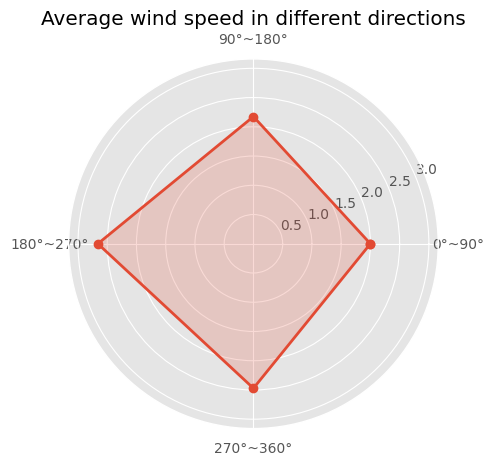

In [10]:
fig = plt.figure()
ax = fig.add_subplot(polar=True) # 極座標
ax.set_title("Average wind speed in different directions")

angles = list(np.linspace(0, 2*np.pi, len(group_dict), endpoint=False))
stats = list(group_dict.values())
labels = ["0°~90°", "90°~180°", "180°~270°", "270°~360°"]

ax.set_ylim(top=max(stats)+0.5)
ax.set_thetagrids([angle * 180/np.pi for angle in angles], labels)

# 把圖形封閉起來
angles.append(angles[0])
stats.append(stats[0])
ax.plot(angles, stats, 'o-', linewidth=2)
# 填入顏色
ax.fill(angles, stats, alpha=0.2)


plt.show()

## Scikit-learn 練習

### 練習一：改善決策樹分類模型

#### 資料分析與特徵工程


##### 標籤分布
大約為 2:1

In [11]:
titanic_path = "./data/train.csv"
titanic_df = pd.read_csv(titanic_path)

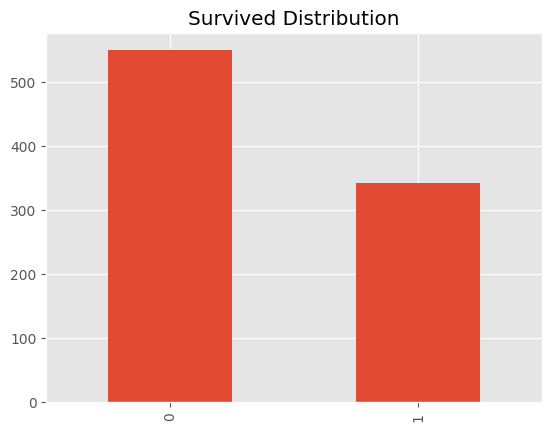

In [12]:
plt.title("Survived Distribution")
titanic_df["Survived"].value_counts().plot(kind='bar')
plt.show()

##### 查看缺失值
查看缺失值的占比 => 發現Cabin缺失比例超過3/4 => 沒有補值的意義 => 刪除該欄位

In [13]:
titanic_df.isnull().sum() / len(titanic_df)

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [14]:
titanic_df = titanic_df.drop(columns=["Cabin"])
titanic_df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C


處理缺失比低的 Embarked 欄位

In [15]:
titanic_df[titanic_df["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


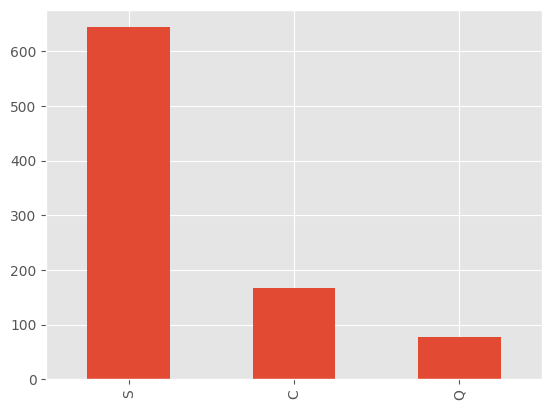

In [16]:
titanic_df["Embarked"].value_counts().plot(kind='bar')
plt.show()

In [17]:
titanic_df.groupby("Pclass")["Fare"].agg(max)

Pclass
1    512.3292
2     73.5000
3     69.5500
Name: Fare, dtype: float64

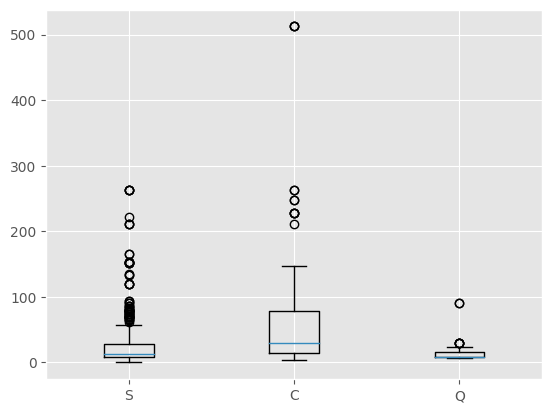

In [18]:
embarked_dict = dict()
embarked_dict['S'] = titanic_df[titanic_df["Embarked"] == 'S']["Fare"]
embarked_dict['C'] = titanic_df[titanic_df["Embarked"] == 'C']["Fare"]
embarked_dict['Q'] = titanic_df[titanic_df["Embarked"] == 'Q']["Fare"]

labels, data = embarked_dict.keys(), embarked_dict.values()
plt.boxplot(data)
plt.xticks(range(1, len(labels) + 1), labels)
plt.show()

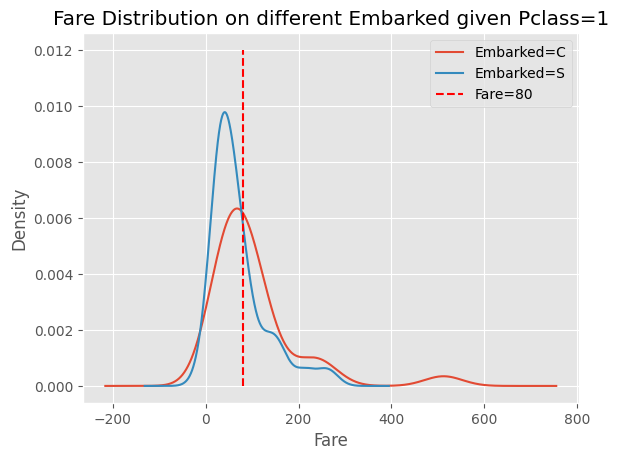

In [19]:
plt.title("Fare Distribution on different Embarked given Pclass=1")
titanic_df[titanic_df["Embarked"] == 'C'].groupby('Pclass').get_group(1)["Fare"].plot(kind='kde', label="Embarked=C")
titanic_df[titanic_df["Embarked"] == 'S'].groupby('Pclass').get_group(1)["Fare"].plot(kind='kde', label="Embarked=S")
plt.vlines([80], 0, 0.012, linestyles='dashed', colors="red", label="Fare=80")
plt.legend()
plt.xlabel("Fare")
plt.show()

In [20]:
titanic_df["Embarked"] = titanic_df["Embarked"].fillna('C')

處理年齡問題

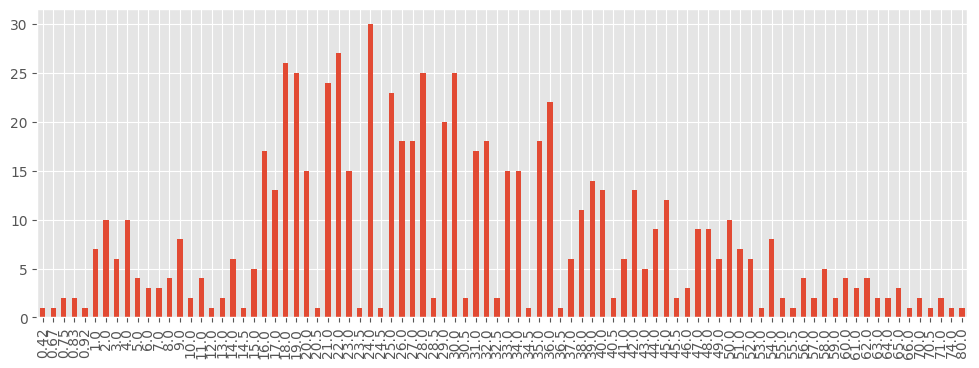

In [21]:
plt.figure(figsize=(12, 4))
titanic_df["Age"].value_counts().sort_index(axis=0).plot(kind='bar')
plt.show()

In [22]:
from collections import Counter
words = list()
for name in titanic_df["Name"]:
    name = name.lower().split()
    words.extend(name)
counter = {k: v for k, v in Counter(words).items() if v >= 20}
counter

{'mr.': 517,
 'mrs.': 125,
 'john': 44,
 'miss.': 182,
 'william': 62,
 'henry': 33,
 'james': 24,
 'master.': 40,
 'charles': 23,
 'george': 22,
 'thomas': 21}

{'mr.': 119, 'mrs.': 17, 'miss.': 36, 'master.': 4, 'else.': 1}


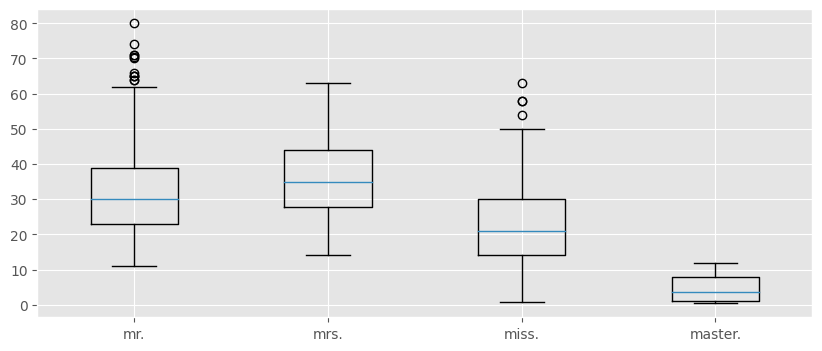

In [23]:
word_age_dict = dict(
    zip(["mr.", "mrs.", "miss.", "master."], [[], [], [], []])
)
word_null_count = dict(zip(["mr.", "mrs.", "miss.", "master.", "else."], [0, 0, 0, 0, 0]))
for name, age in zip(titanic_df["Name"], titanic_df["Age"]):
    if not np.isnan(age):
        name = name.lower().split()
        for word in name:
            if word in word_age_dict:
                word_age_dict[word].append(age)
    else:
        name = name.lower().split()
        found = False
        for word in name:
            if word in word_age_dict:
                found = True
                word_null_count[word] += 1
                break
        if not found:
            word_null_count["else."] += 1

print(word_null_count)

labels, data = word_age_dict.keys(), word_age_dict.values()
plt.figure(figsize=(10, 4))
plt.boxplot(data)
plt.xticks(range(1, len(labels) + 1), labels)
plt.show()

In [24]:
word_age_map = { k: np.median(v) for k, v in word_age_dict.items() }
word_age_map['else.'] = np.median(titanic_df[~titanic_df["Age"].isnull()]["Age"])
print(word_age_map)

{'mr.': 30.0, 'mrs.': 35.0, 'miss.': 21.0, 'master.': 3.5, 'else.': 28.0}


In [25]:
ages = list()
for name, age in zip(titanic_df["Name"], titanic_df["Age"]):
    if np.isnan(age):
        # 缺失填補
        name = name.lower().split()
        hit_word = "else."
        for word in name:
            if word in word_age_map:
                hit_word = word
        ages.append(word_age_map[hit_word])
    else:
        ages.append(age)

titanic_df["Age"] = ages

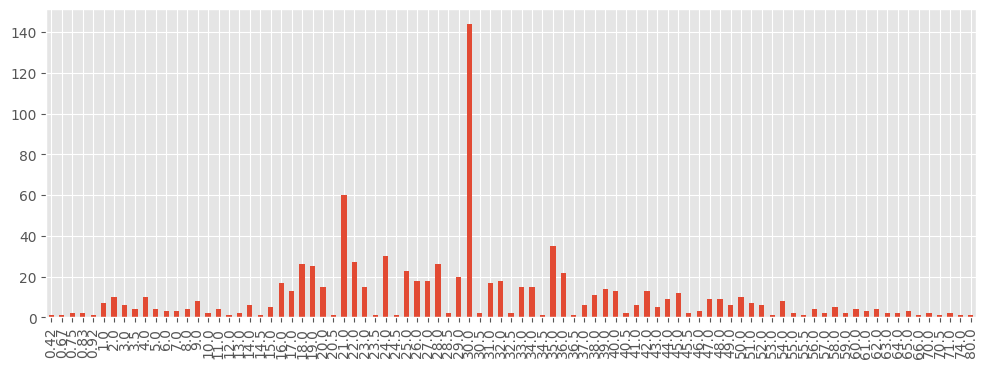

In [26]:
plt.figure(figsize=(12, 4))
titanic_df["Age"].value_counts().sort_index(axis=0).plot(kind='bar')
plt.show()

##### 移除不必要之欄位
* 偏向 id 類型的資料：PassengerId, Ticket, Name
* SibSp, Parch 直覺上無關聯

In [27]:
titanic_df = titanic_df.drop(columns=["PassengerId", "Ticket", "Name", "SibSp", "Parch", "Embarked"])
titanic_df.head(2)

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833


##### 特徵轉換

In [28]:
# 匯入 Label Encoder
from sklearn.preprocessing import LabelEncoder

# 類別型態資料前處理
# 創造 Label Encoder
sex_enc, embarked_enc = LabelEncoder(), LabelEncoder()

# 讀取特徵和標籤
df_x = titanic_df.iloc[:, 1:]
df_y = titanic_df.iloc[:, 0] # 0 -> Survived

# 給予每個類別一個數值
sex_enc.fit(df_x['Sex'])
#embarked_enc.fit(df_x['Embarked'])

# 轉換所有類別成為數值
df_x['Sex'] = sex_enc.transform(df_x['Sex'])
#df_x['Embarked'] = embarked_enc.transform(df_x['Embarked'])

#### 訓練決策樹並預測

評價函數 => 後面會大量用到

In [29]:
# 匯入準確度計算工具
from sklearn.metrics import accuracy_score

def show_train_test_result(model, train_x, train_y, test_x, test_y):
    # 確認模型是否訓練成功
    pred_train = model.predict(train_x)
    # 計算準確度
    train_acc = accuracy_score(train_y, pred_train)

    # 輸出準確度
    print('train accuracy: {}'.format(train_acc))

    # 確認模型是否訓練成功
    pred_test = model.predict(test_x)
    # 計算準確度
    test_acc = accuracy_score(test_y, pred_test)

    # 輸出準確度
    print('test accuracy: {}'.format(test_acc))

##### 未調整參數的決策樹
* overfitting 的狀況嚴重
* 比助教多特徵卻表現更糟

In [30]:
# 匯入決策樹模型
from sklearn.tree import DecisionTreeClassifier
# 匯入 train_test_split 工具
from sklearn.model_selection import train_test_split

# 分割 train and test sets，random_state 固定為 1012
train_x, test_x, train_y, test_y = train_test_split(df_x, df_y, train_size=0.8, random_state=1012)

# 創造決策樹模型
dt = DecisionTreeClassifier(random_state=1012)
# 訓練決策樹模型
dt.fit(train_x, train_y)
# 輸出結果
show_train_test_result(dt, train_x, train_y, test_x, test_y)

train accuracy: 0.9831460674157303
test accuracy: 0.7094972067039106


##### 交叉驗證
* 決策樹 overfitting
    * 樹長太深導致模型過於專牛角尖於訓練資料
    * 利用最大深度來限制模型不斷產生決策
    * 利用最小葉節點樣本數來提前停止產生決策
    * 由於此資料於一開始有 2:1 的現象，因此模型可能更傾向把重點放在未生還（Survived=0）的資料點，設定 balanced 可能可以改善
* 使用 grid search 跑過所有參數組合
* 10-cv 中，我發現以以下參數能在驗證資料有最好的平均表現
    * class_weight = None
    * max_depth = 13
    * min_samples_leaf = 5

In [31]:
from sklearn.model_selection import GridSearchCV

# grid search 的參數值
params = {
    "class_weight": [None, "balanced"],
    "max_depth": np.arange(5, 15),
    "min_samples_leaf": np.arange(1, 10)
}
dt = DecisionTreeClassifier(random_state=1012)

grid_search = GridSearchCV(
    dt,
    param_grid = params,
    cv = 10,
    scoring = "accuracy",
    n_jobs=-1
)

grid_search.fit(train_x, train_y)
print(f"best parameters: {grid_search.best_params_}")
print(f"best scores:     {grid_search.best_score_}")

best parameters: {'class_weight': None, 'max_depth': 13, 'min_samples_leaf': 5}
best scores:     0.8370696400625979


##### 調整參數後的決策樹
以最好的參數重新訓練在原始的訓練資料上，並評斷測試資料表現

In [32]:
# 創造決策樹模型
dt = DecisionTreeClassifier(random_state=1012, **grid_search.best_params_)
# 訓練決策樹模型
dt.fit(train_x, train_y)

# 輸出結果
show_train_test_result(dt, train_x, train_y, test_x, test_y)

train accuracy: 0.8974719101123596
test accuracy: 0.7988826815642458


##### 視覺化決策樹
* 樹狀大略的結構
* 特徵重要性

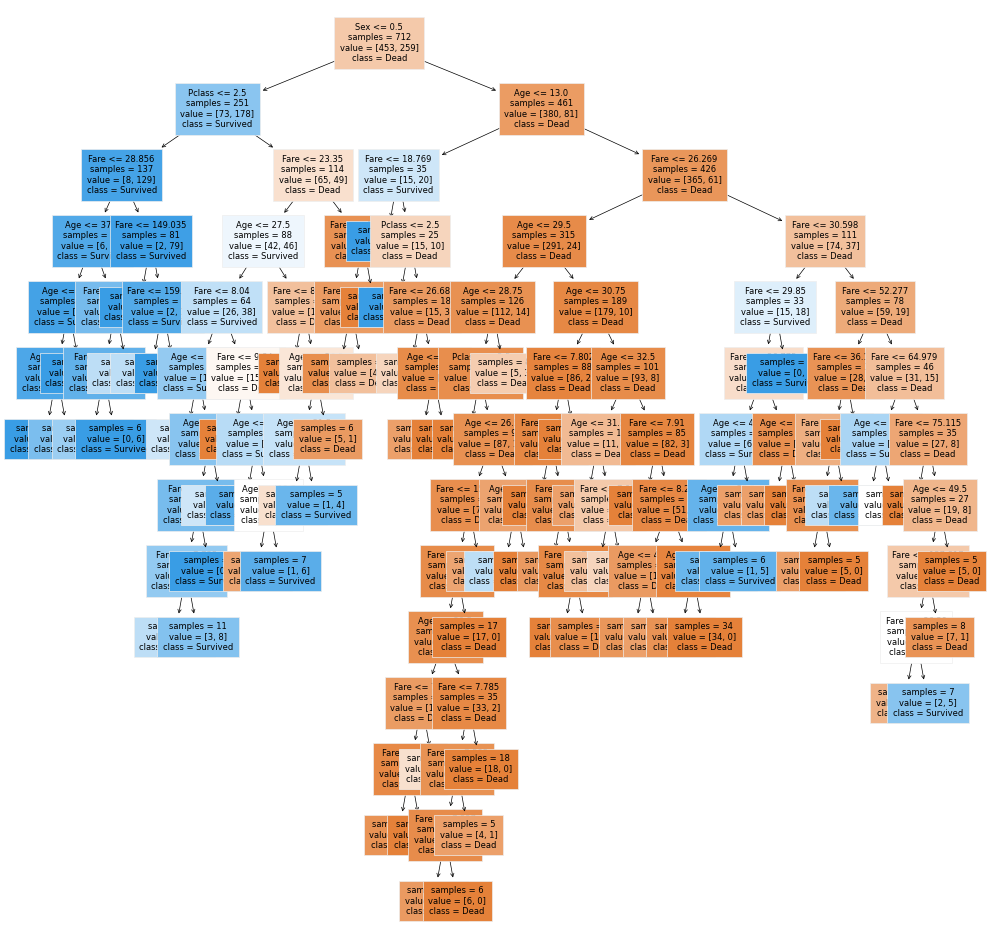

In [33]:
from sklearn import tree
plt.figure(figsize=(12,12))  # set plot size (denoted in inches)
tree.plot_tree(dt, fontsize=6, filled=True, impurity=False, class_names=["Dead", "Survived"], feature_names=train_x.columns)
plt.show()

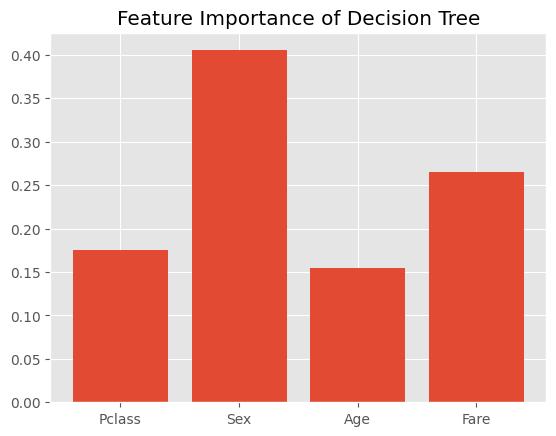

In [34]:
plt.title("Feature Importance of Decision Tree")
plt.bar(test_x.columns, dt.feature_importances_)
plt.show()

### 練習二：使用不同的模型
* 比較 random-forest 與 random-forest-lr

#### 未調整參數的隨機森林
* 未調參數就有決策樹等級的表現

In [35]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=1012)
rf.fit(train_x, train_y)

# 輸出結果
show_train_test_result(rf, train_x, train_y, test_x, test_y)

train accuracy: 0.9831460674157303
test accuracy: 0.7821229050279329


#### 交叉驗證調整隨機森林參數
隨機森林就是多個決策樹，因此參數上沒有太大差異，只多了n_estimators來確定要有幾棵樹

In [36]:
# grid search 的參數值
params = {
    "n_estimators": range(20, 200 ,10),
    "max_depth": range(5, 15),
}
rf = RandomForestClassifier(random_state=1012)

grid_search = GridSearchCV(
    rf,
    param_grid = params,
    cv = 10,
    scoring = "accuracy",
    n_jobs=-1
)

grid_search.fit(train_x, train_y)
print(f"best parameters: {grid_search.best_params_}")
print(f"best scores:     {grid_search.best_score_}")

best parameters: {'max_depth': 7, 'n_estimators': 60}
best scores:     0.8567488262910798


#### 調整參數後的隨機森林
以最好的參數重新訓練在原始的訓練資料上，並評斷測試資料表現

In [37]:
rf = RandomForestClassifier(random_state=1012, **grid_search.best_params_)
rf.fit(train_x, train_y)

# 輸出結果
show_train_test_result(rf, train_x, train_y, test_x, test_y)

train accuracy: 0.9143258426966292
test accuracy: 0.8100558659217877


#### 最好的隨機森林+lr
* 葉節點作為特徵提取 -> 提取有效的交互特徵
* 結合簡單的 lr 來分類

In [38]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression

rf_enc = OneHotEncoder()
train_rf_leaf = rf.apply(train_x)
rf_enc.fit(train_rf_leaf)
test_rf_leaf = rf.apply(test_x)

# random forest 特徵
train_rf_x = rf_enc.transform(train_rf_leaf)
test_rf_x = rf_enc.transform(test_rf_leaf)
lr = LogisticRegression(random_state=1012)
lr.fit(train_rf_x, train_y)

show_train_test_result(lr, train_rf_x, train_y, test_rf_x, test_y)

train accuracy: 0.9803370786516854
test accuracy: 0.770949720670391


#### 交叉驗證調整 lr 參數

In [39]:
params = {
    'C': np.arange(0.1, 2, 0.1),
    'class_weight':['balanced', None]
}
lr = LogisticRegression(random_state=1012, max_iter=500)
grid_search = GridSearchCV(
    lr,
    param_grid = params,
    cv = 10,
    scoring = "accuracy",
    n_jobs=-1
)
grid_search.fit(train_rf_x, train_y)
print(f"best parameters: {grid_search.best_params_}")
print(f"best scores:     {grid_search.best_score_}")

best parameters: {'C': 0.4, 'class_weight': None}
best scores:     0.8918622848200313


#### 調整參數後的隨機森林+lr

In [40]:
lr = LogisticRegression(random_state=1012, **grid_search.best_params_)
lr.fit(train_rf_x, train_y)

show_train_test_result(lr, train_rf_x, train_y, test_rf_x, test_y)

train accuracy: 0.9705056179775281
test accuracy: 0.7877094972067039


#### 交叉驗證調整 PCA 與 lr
方法不好可能是因為轉換後的特徵太稀疏，使用PCA來降維

In [41]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

pca = PCA(random_state=1012)

# set the tolerance to a large value to make the example faster
lr = LogisticRegression(random_state=1012)
pipe = Pipeline(steps=[("pca", pca), ("logistic", lr)])

params = {
    "pca__n_components": [0.7],
    "logistic__C": np.arange(0.1, 1, 0.1),
}
grid_search = GridSearchCV(
    pipe,
    param_grid = params,
    cv = 10,
    scoring = "accuracy",
    n_jobs=-1
)
grid_search.fit(train_rf_x.toarray(), train_y)

print(f"best parameters: {grid_search.best_params_}")
print(f"best scores:     {grid_search.best_score_}")

best parameters: {'logistic__C': 0.30000000000000004, 'pca__n_components': 0.7}
best scores:     0.8652190923317683


#### 調整參數後的隨機森林+PCA+lr


In [42]:
pca = PCA(random_state=1012, n_components=grid_search.best_params_['pca__n_components'])
# set the tolerance to a large value to make the example faster
lr = LogisticRegression(random_state=1012, C=grid_search.best_params_['logistic__C'])
pipe = Pipeline(steps=[("pca", pca), ("logistic", lr)])

pipe.fit(train_rf_x.toarray(), train_y)

show_train_test_result(pipe, train_rf_x.toarray(), train_y, test_rf_x.toarray(), test_y)

train accuracy: 0.8721910112359551
test accuracy: 0.8156424581005587
